In [1]:
from keras import models, layers, optimizers, losses, metrics, datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# Load the IMDB comment sentinent dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10_000)

In [3]:
# Build the index => word translation dictionary and print an example from the dataset
word_index = {value - 3: key for (key, value) in datasets.imdb.get_word_index().items()}
example = ' '.join([word_index.get(idx, '?????') for idx in train_data[0]])
print(example)

of movie have film some thinking telling games developed were friend sits me cagney br quite or especially in one watch some sequences best up talent to that her humor worth in actors br us best part to 3 understand it's br us tiresome century on type about with drama br that's up film it years corny you movie have br included guarantee  br have been made for film some thinking about also but with adaptation br have on run on for film hero not to in their small for this wife this being in br excited karl film humor me hysterical from br scene for film about whose in one end no or such when one acts from it have for interesting by into time in movie become film because to this br life show goers but especially br to i discussion in similar or been some thinking guess all human star good i br to flat with seen its br let but later think so favor would all real it between bias not br guy have his go guess all humor in now they anticipation not no or by far them one seen br guy were film 

In [4]:
# Vectorize word index sequences into binary encoded matrices
def vectorize_sequences(sequences, dimension=10_000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# Validation and training split of data
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [7]:
# Construct and train a fully connected model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
history = model.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 192us/step - loss: 0.4496 - binary_accuracy: 0.8165 - val_loss: 0.2784 - val_binary_accuracy: 0.9121
Epoch 2/20
25000/25000 [==============================] - 3s 114us/step - loss: 0.2552 - binary_accuracy: 0.9094 - val_loss: 0.2153 - val_binary_accuracy: 0.9242
Epoch 3/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.1969 - binary_accuracy: 0.9298 - val_loss: 0.1533 - val_binary_accuracy: 0.9504
Epoch 4/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.1669 - binary_accuracy: 0.9409 - val_loss: 0.1295 - val_binary_accuracy: 0.9594
Epoch 5/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.1431 - binary_accuracy: 0.9485 - val_loss: 0.1205 - val_binary_accuracy: 0.9596
Epoch 6/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.1266 - binary_accuracy: 0.9562 - val_loss: 0.1000 - val_bi

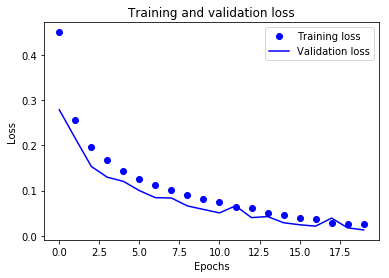

In [9]:
# Plot the training loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(range(len(loss_values)), loss_values, 'bo', label='Training loss')
plt.plot(range(len(val_loss_values)), val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Plot the training accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(range(len(acc_values)), acc_values, 'bo', label='Training accuracy')
plt.plot(range(len(val_acc_values)), val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Evaluate model on the test data
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 4s 167us/step
[0.7783528847277165, 0.84892]
